<a href="https://colab.research.google.com/github/Confidentrf/AI/blob/Machine-Learning/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Liner Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_blobs

n_samples = 10000

# To generate our fabricated data set, we'll create two blobs of
# randomly distributed data at two corners of the graph...
centers = [(0.9, 0.05), (0.05, 0.94)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.4,
                  centers=centers, shuffle=False, random_state=42)

# Then filter out only the values that lie within [0,1]:
features = []
labels = []
for feature, label in zip(X, y):
    if (feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)

# And convert the results back into numpy arrays:
X = np.array(features)
y = np.array(labels)

<ipython-input-2-b214e1123dbc>:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(this_X[:, 0], this_X[:, 1], c=color,


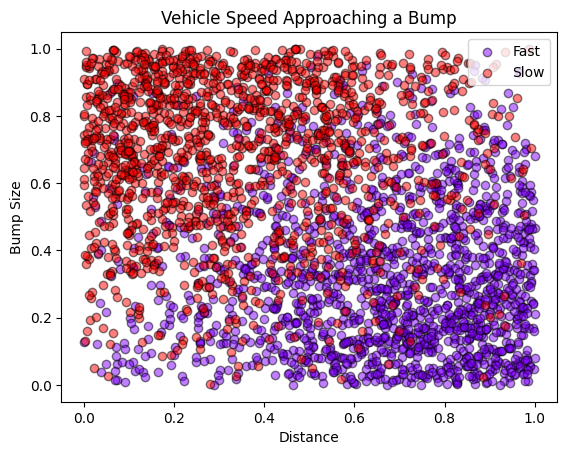

In [2]:
plt.figure()
y_unique = np.unique(y)
class_names = ['Fast', 'Slow']
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X[y == this_y]
    plt.scatter(this_X[:, 0], this_X[:, 1], c=color,
                alpha=0.5, edgecolor='k',
                label=class_names[this_y])
plt.legend(loc="best")
plt.xlabel('Distance')
plt.ylabel('Bump Size')
plt.title("Vehicle Speed Approaching a Bump")
plt.show()

In [3]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1.0)

logreg.fit(X, y)

LogisticRegression()

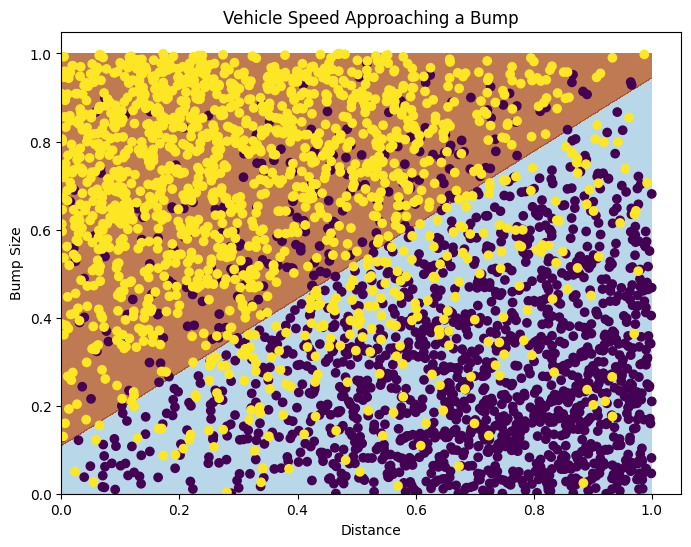

In [4]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 1.0, 0.001),
                     np.arange(0, 1.0, 0.001))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(float))
    plt.xlabel('Distance')
    plt.ylabel('Bump Size')
    plt.title("Vehicle Speed Approaching a Bump")
    plt.show()

plotPredictions(logreg)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.840983606557377

In [6]:
from sklearn.model_selection import cross_val_score

fold_scores = cross_val_score(logreg, X, y, cv=5)
print (fold_scores)
print (np.mean(fold_scores))

[0.86885246 0.84098361 0.8407225  0.82758621 0.83415435]
0.8424598239521925
